# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**DURATION CONSIDERED:**
- mtl: 1,2,3,4 and 5 minutes + 6 minutes as the reference  
- gva: 1,2,3,4,5,6,9 and 12 minutes + 15 minutes as the reference  

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_Analysis of spatial similarity (for a single K, or across multiple Ks)
    

In [1]:
import sys,json, glob
import pandas as pd
sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


# Initialization

### Load configuration file 

In [2]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

# <font color=#00988c> I. Qualitative evaluation
### <font color=#00988c> I.1  </font> Visualizing gva components: each duration and analysis 

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


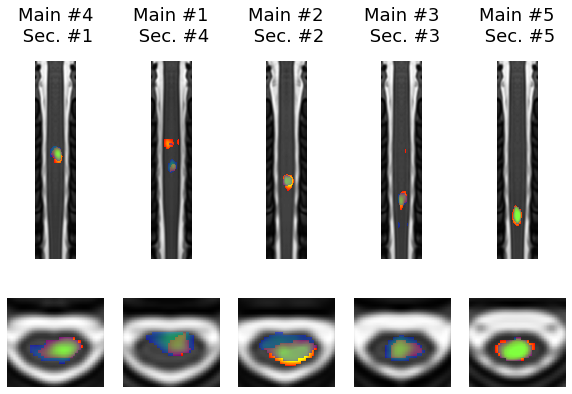

In [4]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
dataset="gva"; 
analysis='ica_duration'
config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/maps/"

for duration in config["data"][dataset][analysis]["spinalcord"]["durations"]:
    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':analysis,"duration": str(duration)+ "min"}
    params_qual_2 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':"ica"}

    #plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=None)
    #plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=True)
plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)
plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=False)

### <font color=#00988c> I.2  </font> Visualizing mtl components: each duration and analysis 

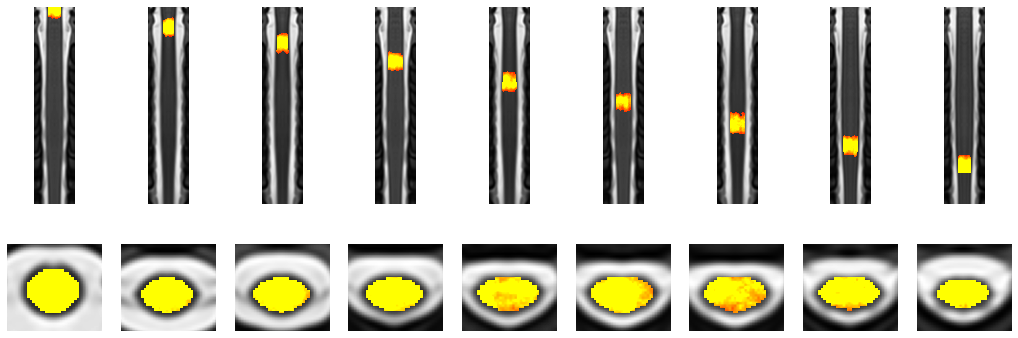

In [4]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
dataset="mtl"; 
analysis='icap_duration'
config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/maps/"

for duration in config["data"][dataset][analysis]["spinalcord"]["durations"]:
    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':analysis,"duration": str(duration)+ "min"}
    #params_qual_2 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':analysis ,"duration":"12min"}

    #plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=None)
    #plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=True)
plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=None)
plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=False)

### <font color=#00988c> I.3 </font> Create a video for illustration

In [5]:
import cv2

redo=False # put True for create an other video
if redo==True:
    dataset="gva"
    analysis='icap_duration'
    config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/maps/"

    img_array = []
    for filename in glob.glob(config["main_dir"] + config["output_dir"] + config["output_tag"] + "*"+analysis+"*.png"):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter(config["main_dir"] + config["output_dir"]  +'Indiv_spinalcord_'+dataset+'_' + analysis + '_movie.avi',cv2.VideoWriter_fourcc(*'MJPG'), 2, size)


    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

# <font color=#00988c> II. Quantitative analyses
### <font color=#00988c>  II.1 </font> Save quantitative measures for each dataset

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord//K_5/comp_zscored/*4D_z*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/1min/K_5/comp_zscored/*4D_z*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/2min/K_5/comp_zscored/*4D_z*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/3min/K_5/comp_zscored/*4D_z*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/4min/K_5/comp_zscored/*4D_z*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/5min/K_5/comp_zscored/*4D_z*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcor

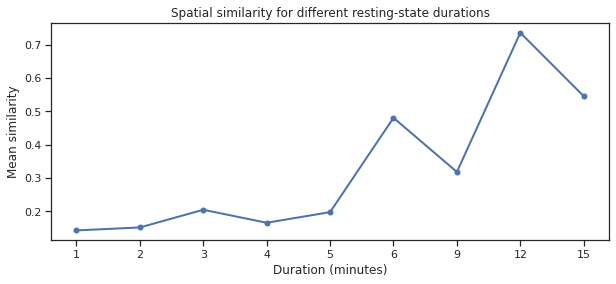

In [22]:

dataframe={}
extract=True# put extract=True to extract the values 
for dataset in ["gva"]:
    dataframe[dataset]={};
    for ana in ["ica_duration"]:
        dataframe[dataset][ana]={};
        
        for measure in ["Dice"]:#,"EuclideanDistance"]:
            config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/"+measure +"/"
            config["output_tag"]= "Duration"
            if extract==True:
                params_quant_1 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)),'dataset':dataset, 'analysis':"ica"}#[config["data"][dataset][ana]["spinalcord"]["durations"][-1]]} 
                params_quant_2 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)), 'dataset':dataset, 'analysis':ana, 't_range': config["data"][dataset][ana]["spinalcord"]["durations"]}

                spine_analysis = SpineOnlyAnalysis(config,params1=params_quant_1,params2=params_quant_2)

                spine_analysis.spatial_similarity(k1=params_quant_1['k_range'][0],t_range1=config["data"][dataset][ana]["spinalcord"]["durations"][-1],t_range2=config["data"][dataset][ana]["spinalcord"]["durations"],similarity_method='Dice',
                                                  save_results=True,save_figure=True)

            input= glob.glob(config["main_dir"] +config["output_dir"] + config["output_tag"] + "*_" +ana+ "_*duration.txt")[0]
            
            
            dataframe[dataset][ana][measure]=pd.read_csv(input, header=0,sep=' ')
         
#frames=[dataframe["mtl"]["ica_duration"]["Dice"],dataframe["gva"]["ica_duration"]["Dice"],dataframe["mtl"]["icap_duration"]["Dice"],dataframe["gva"]["icap_duration"]["Dice"]]; frames=pd.concat(frames)


### <font color=#00988c>  II.2 </font> Quantative plots

In [7]:
import seaborn as sns
colors=['#efb537','#20b5bf'] #'#273248'
sns.set(style="ticks",  font='sans-serif')

g=sns.catplot(y="Dice",x="duration",data=frames,hue="analysis",col="dataset",kind="point",markers=["^", "o"],
           palette=colors,linewidth=3,edgecolor='white',alpha=1,s=20) #,style=Method

# oupsi rerun duration for gva !


NameError: name 'frames' is not defined